### Крутая тема про сеточки

Начать полезно тут, попробуйте зафитить все датасеты.

https://playground.tensorflow.org/
    


In [108]:
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

Генерим датасет и рисуем как он выглядит

In [109]:
x, y = make_moons(n_samples=200, noise = 0.2)

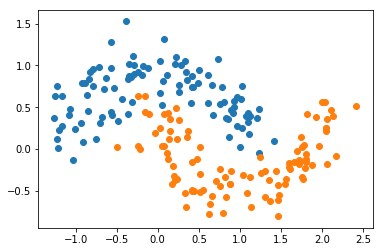

In [117]:
plt.scatter(x[:,0][y == 0], x[:,1][y == 0])
plt.scatter(x[:,0][y == 1], x[:,1][y == 1])

Сплитим пока на train\test

In [112]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

Создайте нейронную сеть используя MLPClassifier

Обратите внимание на следующие параметры:
- hidden_layer_sizes
- activation
- learning_rate ($ \alpha $)

По умолчанию MLPClassifier сам поймет какой тип выходной переменной и соответствено использует либо log_loss либо softmax_crossentropy. 

Так же по умолчанию MLPClassifier будет учиться до победного. Либо по train_loss, либо, если early_stopping = True, MLPClassifier автоматически выделит небольшой валидационный сет и будет учиться пока на нем не перестанет падать loss. Мы же чтобы посмотреть прогресс поставим параметры max_iter=1, warm_start=True. Тогда каждый раз при запуске fit будет прогоняться одна эпоха, и при следующем запуске fit веса сети будут сохраняться

In [118]:
nn = MLPClassifier( *YOUR CODE HERE* )

Теперь запустите сеть на 1000 эпох используя цикл for. На каждом шаге посчитайте train и test loss. Постройте графики

In [119]:
train_losses = []
test_losses = []

In [ ]:
for i in range(1000):
    *YOUR CODE HERE* 

Для того чтобы подписать графики можно добавить plt.plot(....., label = 'название кривой'), и в конце написать plt.legend()

In [ ]:
*YOUR CODE HERE*

plt.legend()

### MNIST 

Когда сетка более менее заработала предлагаю, взять датасет с цифрами, и зарешать его одной сеткой. 

In [122]:
import pandas as pd

/home/anton/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [128]:
data = pd.read_csv("./data/train.csv")

x = data[data.columns[1:]].values
y = data[data.columns[0]].values


Y надо сделать OneHot

In [125]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
ohe =  OneHotEncoder()

In [140]:
y_oh = ohe.fit_transform(y.reshape(-1, 1)).toarray()

Ура, можно пилить трейн\вал\тест сплит и делать сетку! 